In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")
print(uproot.__version__)
import uproot3
print(uproot3.__version__)
import uproot3 as uproot
import argparse

4.3.4
3.14.4


In [2]:
ptbins=[97,  133,  174,  220,  272,  330,  395,  468,  548,  638,  737,  846, 967, 1101, 1248, 1410, 1588, 1784, 2000, 2238, 2500, 2787]

### We want to answer the question: what is a good event weight threshold?

In [30]:
def plt_weights(Weight_file, N):
    bins=100
    with uproot.open(Weight_file) as f:
        print('file keys', f.keys())
        tree=f['tree']
        print('tree keys', tree.keys())
        evweight_pre = tree.arrays('evtWeight', outputtype=tuple) 
        #yes doing below is comput. faster than converting the uproot to np
        w_min, w_max = np.array(evweight_pre).min(), np.array(evweight_pre).max()
        print('wmin, wmax = \t ', w_min,',\t', w_max)
        pTJet = tree.arrays('pTJet', outputtype=tuple)
        
        fig, ax = plt.subplots(1,2)
        if 'pre' in Weight_file: parton_or_hadron = 'parton'
        else: parton_or_hadron = 'hadron'
        ax[0].hist(evweight_pre, label='%s jets' % parton_or_hadron,bins=bins)
        ax[0].set_yscale('log')
        ax[0].set_title(r'CUEP8M1 $N_{events}$ = %s' % str(N))
        ax[0].set_xlabel(r'$w_{event}$')
        # ax[0].set_xlim(0,0.5)
        ax[0].legend()
        
        ax[1].hist(pTJet, label='%s jets $p_T$' % parton_or_hadron,bins=bins)
        ax[1].set_title('CUEP8M1')
        ax[1].set_xlabel(r'jet $p_T$')
        ax[1].legend()      
        
        plt.tight_layout(); plt.show()

file keys [b'tree;1']
tree keys [b'numJets', b'pTJet', b'evtWeight']
wmin, wmax = 	  1.8273135085853847e-11 ,	 0.998180472645993


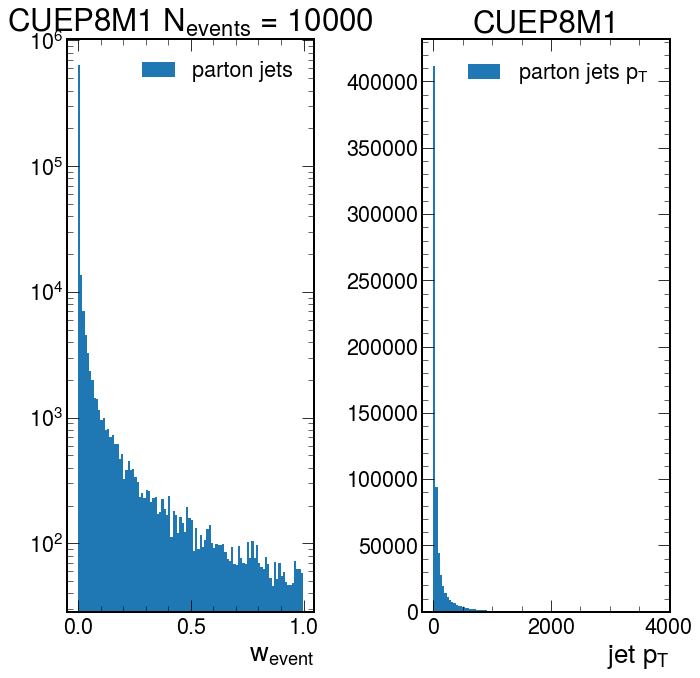

In [31]:
# w_file='WEIGHTS_post_100K_ParisParams.root'
# w_file='WEIGHTS_post_10K_ParisParams.root'
# w_file='WEIGHTS_post_10K_ParisParams.root'
w_file='WEIGHTS_pre_10K_ParisParams.root'
plt_weights(w_file, N=10000)

In [58]:
def hist_ax(ax, values, label, xlabel, xrange=None, yscale=None, ylabel=None, ax_title=None, alpha=1):
    ax.hist(values, label=label, alpha=alpha); ax.legend()
    ax.set_xlabel(xlabel)
    if ax_title:
        ax.set_title(ax_title)
    if yscale:
        ax.set_yscale(yscale)
    if xrange:
        xmin, xmax = xrange
        ax.set_xlim(xmin,xmax)

def show_basic_info(values, label):
    #assuming uproot tuple values
    val_min, val_max = np.array(values).min(), np.array(values).max()
    print('\n %s_min, %s_max = \t ' % (label, label), val_min,',\t', val_max, '\n')
    shape = np.array(values).shape
    print('%s_shape = ' % label, shape) 

In [65]:
def plt_weights_two_files(filepre, filepost, N):
    with uproot.open(filepre) as filepre:
        with uproot.open(filepost) as filepost:
            print('file keys', filepre.keys())
            treepre = filepre["tree"]
            treepost = filepost["tree"]
            print()
            print('treepre keys',treepre.keys())
            print('treepost keys',treepost.keys())
            print()
            print('treepre["pTJet"] =',treepre["pTJet"])
    #         print()
    
            
            ptpre = treepre.arrays(["pTJet"], outputtype = tuple)
            ptpost = treepost.arrays(["pTJet"], outputtype = tuple)
            show_basic_info(ptpre, label='parton_jet_pT')
            
            evweight_pre = treepre.arrays('evtWeight', outputtype=tuple)
            evweight_post = treepost.arrays('evtWeight', outputtype=tuple) 
            show_basic_info(evweight_pre, label='parton_jet_event_weights')
            show_basic_info(evweight_post, label='hadron_jet_event_weights')


#             fig, ax = plt.subplots(1,2)
#             if 'pre' in Weight_file: parton_or_hadron = 'parton'
#             else: parton_or_hadron = 'hadron'
#             ax[0].hist(evweight_pre, label='%s jets' % parton_or_hadron,bins=bins)
#             ax[0].set_title(r'CUEP8M1 $N_{events}$ = %s' % str(N))
#             ax[0].set_xlabel(r'$w_{event}$')
#             # ax[0].set_xlim(0,0.5)
#             ax[0].legend()

#             ax[1].hist(pTJet, label='%s jets $p_T$' % parton_or_hadron,bins=bins)
#             ax[1].set_title('CUEP8M1')
#             ax[1].set_xlabel(r'jet $p_T$')
#             ax[1].legend()      


            fig, ax = plt.subplots(1,2)
            hist_ax(ax=ax[0], values=evweight_pre, label='parton jet', xlabel='event weight', alpha=0.35, yscale='log')
            hist_ax(ax=ax[0], values=evweight_post, label='hadron jet', xlabel='event weight', alpha=0.35, yscale='log')

            hist_ax(ax=ax[1], values=ptpre, label='parton jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log')
            hist_ax(ax=ax[1], values=ptpost, label='hadron jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log')
            
            fig.suptitle(r'CUEP8M1 $N_{events}$ = %s' % str(N))
            plt.tight_layout(); plt.show()

file keys [b'tree;1']

treepre keys [b'numJets', b'pTJet', b'evtWeight']
treepost keys [b'numJets', b'pTJet', b'evtWeight']

treepre["pTJet"] = <TBranch b'pTJet' at 0x7fba26a066d0>

 parton_jet_pT_min, parton_jet_pT_max = 	  0.0 ,	 3821.879067850399 

parton_jet_pT_shape =  (1, 691969)

 parton_jet_event_weights_min, parton_jet_event_weights_max = 	  1.8273135085853847e-11 ,	 0.998180472645993 

parton_jet_event_weights_shape =  (1, 691969)

 hadron_jet_event_weights_min, hadron_jet_event_weights_max = 	  2.5271318218963586e-11 ,	 0.992061155758257 

hadron_jet_event_weights_shape =  (1, 71765)


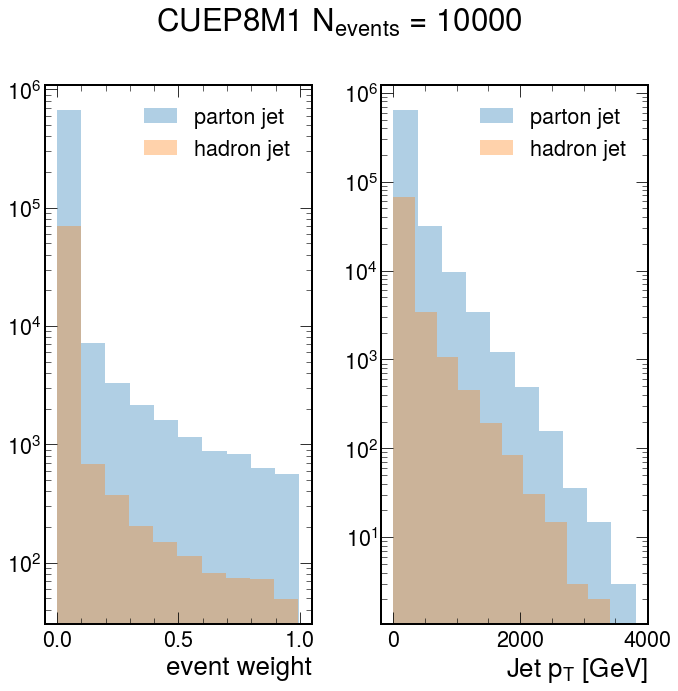

In [66]:
file_pre='WEIGHTS_pre_10K_ParisParams.root'
file_post='WEIGHTS_post_10K_ParisParams.root'
plt_weights_two_files(file_pre, file_post, N=10000)